```{image} anvil-logo.png
:width: 200px
:class: analytics-logo
```

# AnVIL Analytics

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
# !pip install google_auth_oauthlib 
# !pip install install google-api-python-client
# !pip install pandas 
# !pip install numpy
# !pip install matplotlib
# !pip install google-cloud-bigquery
# !pip install db-dtypes
# !pip install -e "git+https://github.com/DataBiosphere/data-browser.git@84fb865c471c128723e1144440837ae0b1da898b#egg=analytics&subdirectory=analytics/hdgar-book/analytics_package"

In [1]:
from IPython.display import display
import analytics.charts as ac

%load_ext autoreload
%autoreload 2

import analytics_anvil as anvil

GA_PROPERTY = "207946923" # AnVIL portal
ANALYTICS_START = "2020-02-01"
TODAY = 'today'
PERIOD = "2022-06"
PREV_PERIOD = "2022-05"

default_params = {
    "property": GA_PROPERTY,
    "index_key_formatter": anvil.adjust_table_index_key,
    "period": PERIOD,
    "prev_period": PREV_PERIOD,
    "segment": "gaid::Wd1ZSCqRRsG3mC6vBpA9yA"
}

ac.authenticate_ga('ANVIL_ANALYTICS_REPORTING_CLIENT_SECRET_PATH')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=526897014808-dq9pt3bmnutqqjdvj1f5roflpgcvqmpt.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fanalytics.readonly&state=lEeucJC6RGXoIRGPi4lyYJSR2Isanx&access_type=offline


In [2]:
ac.init_tables()

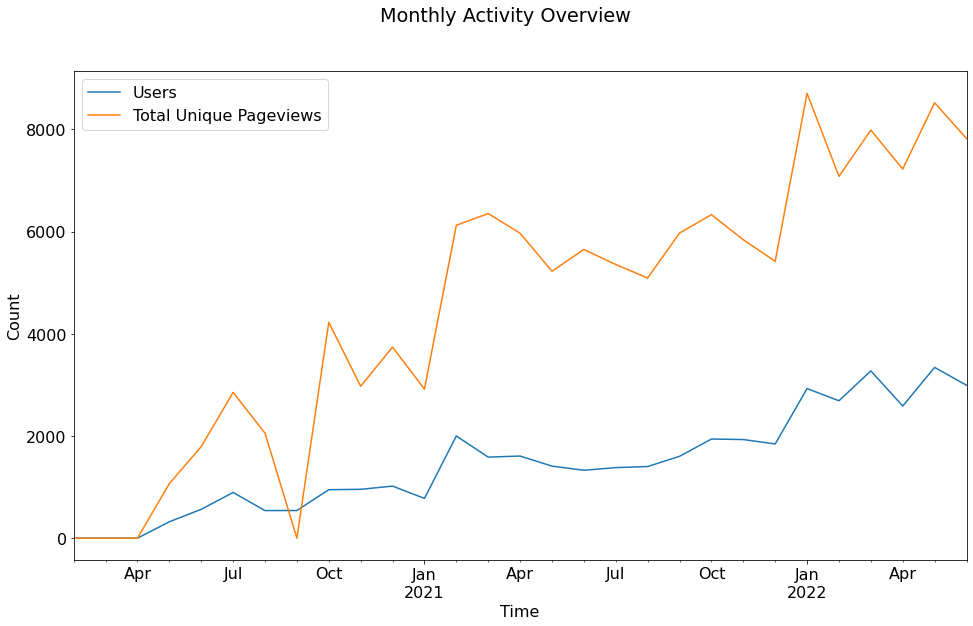

In [36]:
users_over_time_table = anvil.plot_users_over_time(start_date=ANALYTICS_START, end_date=TODAY, **default_params)

In [4]:
display(users_over_time_table)

## Users and sessions

In [5]:
ac.show_difference_table("Total Users", None, "ga:users", None, **default_params)

In [6]:
ac.show_difference_table("Returning Users", None, "ga:users", None, filters="ga:userType==Returning Visitor", **default_params)

In [7]:
ac.show_difference_table("Total Visits", None, "ga:sessions", None, **default_params)

## Page Views

In [32]:
ac.show_difference_table("Total", None, "ga:pageviews", None, **default_params)

## Top referrers

In [33]:
ac.show_difference_table("User Sessions", "Source", "ga:sessions", "ga:fullReferrer", **default_params)

In [8]:
ac.show_difference_table("Users", "Referrer", "ga:users", "ga:source", **default_params)

## Social network referrers

In [9]:
ac.show_difference_table("User Sessions", "Social Network", "ga:sessions", "ga:socialNetwork", **default_params)

## Top countries

In [10]:
ac.show_difference_table("Users", "Country", "ga:users","ga:country", **default_params)

## Device category

In [11]:
ac.show_difference_table(["Users", "Percentage of users"], "Category", "ga:users", "ga:deviceCategory", percentage_metrics={"ga:users"}, **default_params)

## Top Pages

In [34]:
ac.show_difference_table("Page Views", "Page", "ga:pageviews", "ga:pagePath", **default_params)

## Top Landing Pages

In [12]:
ac.show_difference_table("Entrances", "Page", "ga:entrances","ga:pagePath", **default_params)

## Outbound Links to Terra
### Terra Login

In [13]:
ac.show_difference_table("Count", "URL", "ga:hits", "ga:dimension3", filters="ga:dimension3=~^https://anvil.terra.bio/(?:\\#workspaces)?$", **default_params)

### Terra Resources

In [14]:
ac.show_difference_table("Count", "Resource", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==External Link;ga:dimension1==Workspace", **default_params)

## Outbound Links to dbGap
### Top Studies

In [15]:
ac.show_difference_table("Count", "Study ID", "ga:hits", "ga:eventLabel", filters="ga:dimension1==Study;ga:eventLabel=~^phs", **default_params)

## Outbound Links to Dockstore
### Links to Dockstore Organization Page

In [31]:
ac.show_difference_table("Count", "URL", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==External Link;ga:dimension3==https://dockstore.org/organizations/anvil", **default_params)

### Top References

In [29]:
ac.show_difference_table("Count", "URL", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==External Link;ga:dimension1==Reference;ga:dimension2==Dockstore", **default_params)

## Outbound Links to Gen3
### Links to Gen3 Data Browser

In [18]:
ac.show_difference_table("Count", "URL", "ga:hits", "ga:dimension3", filters="ga:eventCategory==External Link;ga:dimension3==https://gen3.theanvil.io/", **default_params)

## Outbound Links to Tools

In [19]:
ac.show_difference_table("Count", "Tool", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==External Link;ga:dimension1==Tool", **default_params)

## Outbound Links to Data Consortia

In [20]:
ac.show_difference_table("Count", "Consortia", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==External Link;ga:dimension1==Data Consortium", **default_params)

## Outbound Links to General Resources (NIH/NHGRI)

In [21]:
ac.show_difference_table("Count", ["NIH/NHGRI", "URL"], "ga:hits", ["ga:dimension2", "ga:dimension3"], filters="ga:eventCategory==External Link;ga:dimension1==Reference;ga:dimension2=~NIH|NHGRI", **default_params)

## Video Views

In [22]:
ac.show_difference_table("Count", "Video", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==Video;ga:eventAction==start", **default_params)

## Data Dashboard
### Top Facet Terms

In [23]:
ac.show_difference_table("Count", ["Term Name", "Facet"], "ga:hits", ["ga:eventLabel", "ga:dimension5"], filters="ga:eventCategory==Search;ga:eventAction==Select", **default_params)

### Top Text Searches

In [24]:
ac.show_difference_table("Count", "Text Input", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==Search;ga:eventAction==Enter Text;ga:eventLabel=~.{3\\,}", **default_params)

## Site Search
### Top Text Searches

In [25]:
ac.show_difference_table("Count", "Text Input", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==Site Search;ga:eventAction==Search;ga:eventLabel=~.{3\\,}", **default_params)

### Top Search Click Throughs

In [26]:
ac.show_difference_table("Count", "Clicked Search Result", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==Site Search;ga:eventAction==Select Search Result", **default_params)